<a href="https://colab.research.google.com/github/Yassine-Feki/M-moire-ESG-EV-EBITDA-/blob/main/m%C3%A9moire_ESG_EV_EBITDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm



In [128]:
# Upload du fichier
uploaded = files.upload()

Saving communication services.xlsx to communication services (14).xlsx


In [129]:
fichier = list(uploaded.keys())[0]
df = pd.read_excel(fichier)
display(df)


,Name,Country,Market Cap,Revenues,EV,EBITDA,EV/EBITDA,ESG Score,Norm rating,alpha,ESG EV/EBITDA
0,infroma Plc,UK,13201,3675.0,15458.0,1110.0,13.90,39.0,-0.306,0.2460,12.90
1,Publicis groupe sa,France,25265,14802.0,26673.0,2504.0,10.70,50.0,-0.086,0.1990,10.50
2,telefonica,Spain,24125,40747.0,68261.0,7721.0,8.80,75.0,0.414,0.1710,9.50
3,swisscom,Swiss,26811,11331.0,34353.0,3970.0,8.70,64.0,0.194,0.1680,8.90
4,vodafone,UK,22337,36717.0,71992.0,8387.0,8.60,74.0,0.394,0.1670,9.10
5,deutsche telekom,Germany,111768,114794.0,282726.0,39276.0,7.20,58.0,0.074,0.1440,7.30
6,telenor,Norway,14839,6908.0,22623.0,2221.0,10.20,55.0,0.014,0.1920,10.20
7,koninklijke,Netherlands,13605,5473.0,19659.0,2223.0,8.80,46.0,-0.166,0.1710,8.60
8,BT group,UK,14869,24346.0,39978.0,7559.0,5.30,57.0,0.054,0.1100,5.30
9,Orange SA,France,26050,44122.0,62616.0,13124.0,4.80,25.0,-0.586,0.1000,4.50


In [130]:
data_to_plot = df[['EV/EBITDA', 'ESG EV/EBITDA']]


In [131]:
data_to_plot = data_to_plot.rename(columns={'ESG EV/EBITDA': 'ESG-adjusted'})


<Axes: >

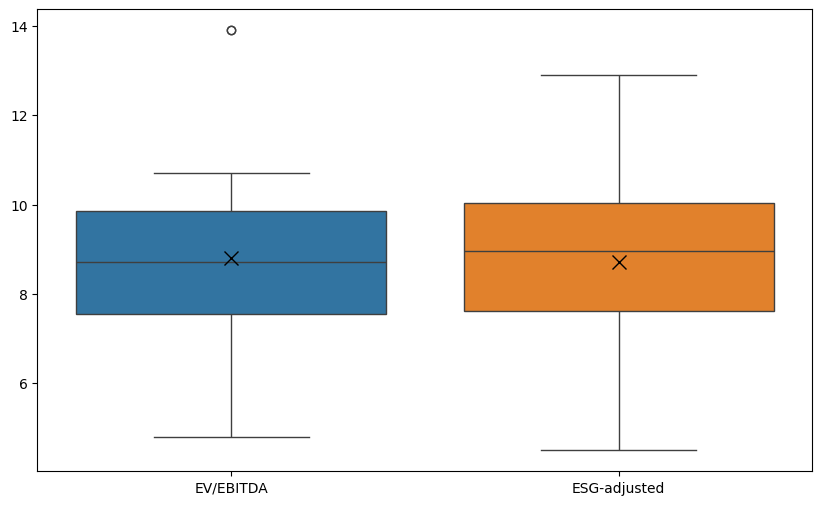

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, showmeans=True, meanprops={"marker":"x",
                       "markerfacecolor":"black",
                       "markeredgecolor":"black",
                       "markersize":"10"})


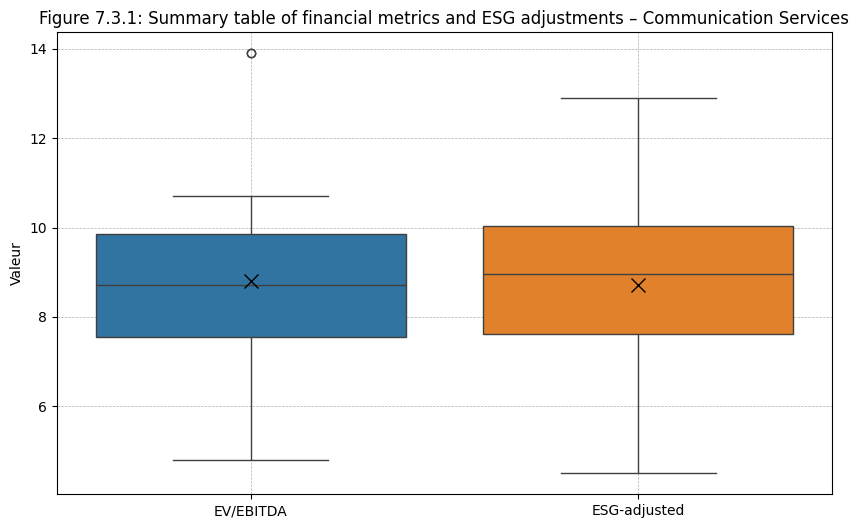

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, showmeans=True, meanprops={"marker":"x",
                       "markerfacecolor":"black",
                       "markeredgecolor":"black",
                       "markersize":"10"})

# Ajoutez les titres et les labels pour correspondre au graphique original
plt.title('Figure 7.3.1: Summary table of financial metrics and ESG adjustments – Communication Services', fontsize=12)
plt.ylabel('Valeur')
plt.xlabel('') # Laissez l'axe x vide car les étiquettes sont gérées par le boxplot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Affichez le graphique
plt.show()

In [134]:


# Nettoyer les noms de colonnes pour enlever les espaces
df.columns = df.columns.str.strip()

# Filtrer les lignes de statistiques (Min, Max, etc.)
df_cleaned = df.loc[~df['Name'].isin(['min', 'Max', 'Average', 'Median'])]

# Sélectionner uniquement les colonnes numériques pour le calcul
numerical_cols = ['Market Cap', 'Revenues', 'EV', 'EBITDA', 'EV/EBITDA', 'ESG Score', 'Norm rating', 'alpha', 'ESG EV/EBITDA']
df_numerical = df_cleaned[numerical_cols]

# Calculer la matrice de corrélation
correlation_matrix = df_numerical.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation des métriques financières et ESG :")
print(correlation_matrix)


Matrice de corrélation des métriques financières et ESG :
               Market Cap  Revenues        EV    EBITDA  EV/EBITDA  ESG Score  \
Market Cap       1.000000  0.924448  0.977170  0.957621  -0.253063   0.117222   
Revenues         0.924448  1.000000  0.974068  0.981466  -0.465106   0.155435   
EV               0.977170  0.974068  1.000000  0.985578  -0.337414   0.181247   
EBITDA           0.957621  0.981466  0.985578  1.000000  -0.452128   0.063984   
EV/EBITDA       -0.253063 -0.465106 -0.337414 -0.452128   1.000000   0.032244   
ESG Score        0.117222  0.155435  0.181247  0.063984   0.032244   1.000000   
Norm rating      0.117222  0.155435  0.181247  0.063984   0.032244   1.000000   
alpha           -0.240211 -0.455366 -0.323862 -0.445276   0.998090   0.077742   
ESG EV/EBITDA   -0.236123 -0.432952 -0.308888 -0.440848   0.985204   0.190358   

               Norm rating     alpha  ESG EV/EBITDA  
Market Cap        0.117222 -0.240211      -0.236123  
Revenues          0.155

In [137]:
correlation_matrix = df_numerical.corr()
print(correlation_matrix)



               Market Cap  Revenues        EV    EBITDA  EV/EBITDA  ESG Score  \
Market Cap       1.000000  0.924448  0.977170  0.957621  -0.253063   0.117222   
Revenues         0.924448  1.000000  0.974068  0.981466  -0.465106   0.155435   
EV               0.977170  0.974068  1.000000  0.985578  -0.337414   0.181247   
EBITDA           0.957621  0.981466  0.985578  1.000000  -0.452128   0.063984   
EV/EBITDA       -0.253063 -0.465106 -0.337414 -0.452128   1.000000   0.032244   
ESG Score        0.117222  0.155435  0.181247  0.063984   0.032244   1.000000   
Norm rating      0.117222  0.155435  0.181247  0.063984   0.032244   1.000000   
alpha           -0.240211 -0.455366 -0.323862 -0.445276   0.998090   0.077742   
ESG EV/EBITDA   -0.236123 -0.432952 -0.308888 -0.440848   0.985204   0.190358   

               Norm rating     alpha  ESG EV/EBITDA  
Market Cap        0.117222 -0.240211      -0.236123  
Revenues          0.155435 -0.455366      -0.432952  
EV                0.181247 

Résultats de la régression linéaire :
                            OLS Regression Results                            
Dep. Variable:              EV/EBITDA   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.124
Method:                 Least Squares   F-statistic:                  0.008326
Date:                Thu, 14 Aug 2025   Prob (F-statistic):              0.930
Time:                        16:42:31   Log-Likelihood:                -23.334
No. Observations:                  10   AIC:                             50.67
Df Residuals:                       8   BIC:                             51.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

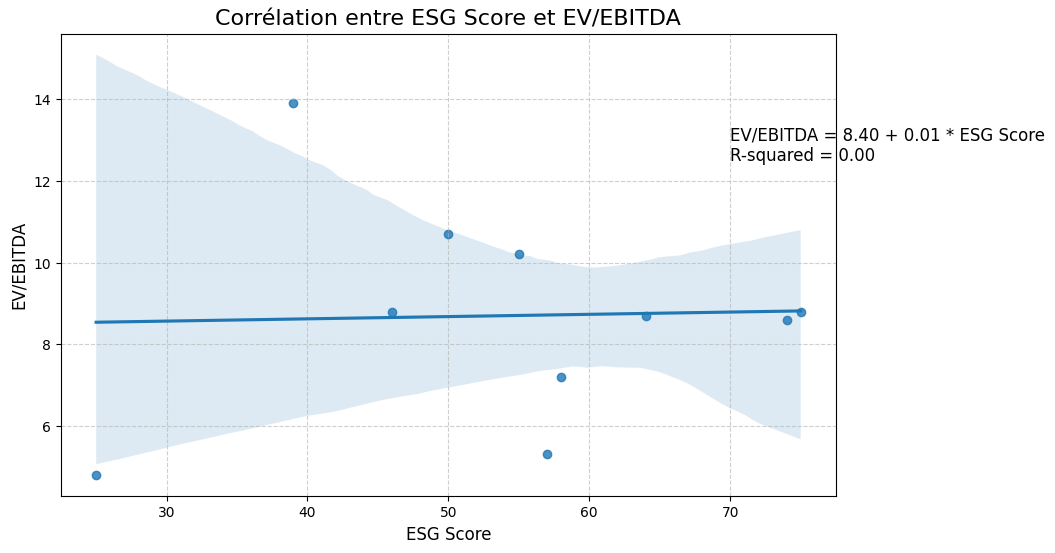

In [138]:
# Nettoyer les noms de colonnes pour enlever les espaces
df.columns = df.columns.str.strip()

# Filtrer les lignes de statistiques (Min, Max, etc.)
df_cleaned = df.loc[~df['Name'].isin(['min', 'Max', 'Average', 'Median'])]

# Définir les variables X (indépendante) et Y (dépendante)
X = df_cleaned['ESG Score']
Y = df_cleaned['EV/EBITDA']

# Ajouter une constante à X pour le modèle de régression
X = sm.add_constant(X)

# Créer et ajuster le modèle de régression linéaire
model = sm.OLS(Y, X).fit()

# Afficher le résumé des résultats du modèle
print("Résultats de la régression linéaire :")
print(model.summary())

# Créer le graphique
plt.figure(figsize=(10, 6))

# Créer un nuage de points avec la ligne de régression
sns.regplot(x='ESG Score', y='EV/EBITDA', data=df_cleaned)

# Ajouter des annotations pour le R-squared et l'équation
r_squared = model.rsquared
alpha_val = model.params['const']
beta_val = model.params['ESG Score']

# Ajouter l'équation sur le graphique
plt.text(70, 13, f'EV/EBITDA = {alpha_val:.2f} + {beta_val:.2f} * ESG Score', fontsize=12)

# Ajouter le R-squared sur le graphique
plt.text(70, 12.5, f'R-squared = {r_squared:.2f}', fontsize=12)

# Ajouter un titre et des labels
plt.title('Corrélation entre ESG Score et EV/EBITDA', fontsize=16)
plt.xlabel('ESG Score', fontsize=12)
plt.ylabel('EV/EBITDA', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Sauvegarder le graphique
plt.savefig('regression_esg_ev_ebitda.png')

# Afficher le graphique
plt.show()